In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
# Load the dataset
dataframe_Amazon_Sales_data = pd.read_csv("Amazon Sales data.csv")

In [42]:
# display the first few rows of the dataframe
dataframe_Amazon_Sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [43]:
# Display the shape of the dataframe
dataframe_Amazon_Sales_data.shape

(100, 14)

In [44]:
# Display the columns of the dataframe

missing_values = dataframe_Amazon_Sales_data.isnull().sum()

data_types = dataframe_Amazon_Sales_data.dtypes

In [45]:
# Display the first few rows of missing values
dataframe_Amazon_Sales_data['Order Date'] = pd.to_datetime(dataframe_Amazon_Sales_data['Order Date'])
dataframe_Amazon_Sales_data['Ship Date'] = pd.to_datetime(dataframe_Amazon_Sales_data['Ship Date'])

# Display the data types of the columns
dataframe_Amazon_Sales_data.dtypes


Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [46]:
# Grouping the data by 'Region' and calculating the total revenue, cost, and profit
region_sales = dataframe_Amazon_Sales_data.groupby('Region')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

region_sales

,Region,Total Revenue,Total Cost,Total Profit
0,Asia,21347091.02,15233245.15,6113845.87
1,Australia and Oceania,14094265.13,9372105.10,4722160.03
2,Central America and the Caribbean,9170385.49,6323477.64,2846907.85
3,Europe,33368932.11,22285993.48,11082938.63
4,Middle East and North Africa,14052706.58,8291514.72,5761191.86
5,North America,5643356.55,4185413.79,1457942.76
6,Sub-Saharan Africa,39672031.43,27488820.03,12183211.40


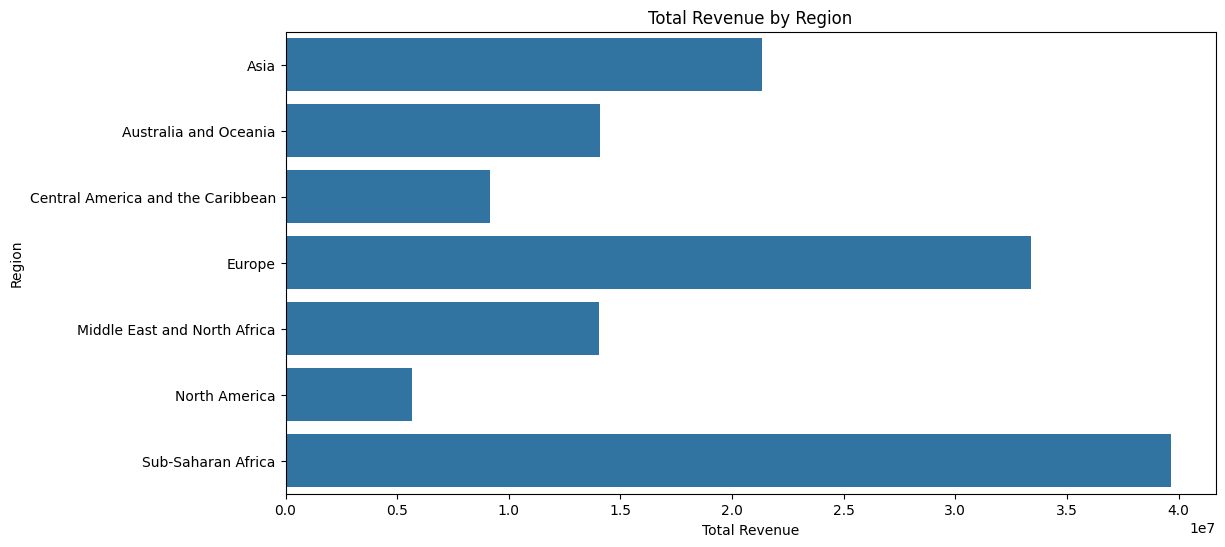

In [47]:
# Display the first few rows of the grouped data
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Total Revenue', y='Region')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()


In [48]:
# Grouping the data by 'Sales Channel' and calculating the total revenue, cost, and profit
sales_channel_analysis = dataframe_Amazon_Sales_data.groupby('Sales Channel')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

(sales_channel_analysis)


,Sales Channel,Total Revenue,Total Cost,Total Profit
0,Offline,79094809.20,54174082.53,24920726.67
1,Online,58253959.11,39006487.38,19247471.73


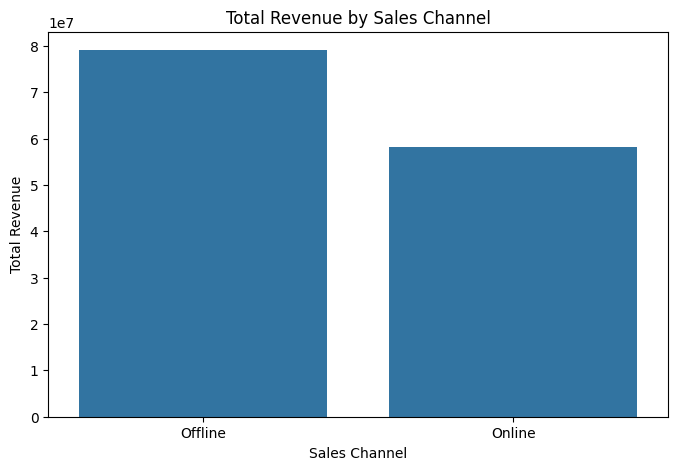

In [49]:
# Display the first few rows of the sales channel analysis
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

In [50]:
# Grouping the data by 'Country' and calculating the total revenue
country_sales = dataframe_Amazon_Sales_data.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)

# top 10 country
(country_sales.head(10))


,Country,Total Revenue
24,Honduras,6336545.48
46,Myanmar,6161257.90
16,Djibouti,6052890.86
72,Turkmenistan,5822036.20
41,Mexico,5643356.55
71,The Gambia,5449517.95
35,Lithuania,5396577.27
56,Rwanda,5253769.42
4,Azerbaijan,4478800.21
7,Brunei,4368316.68


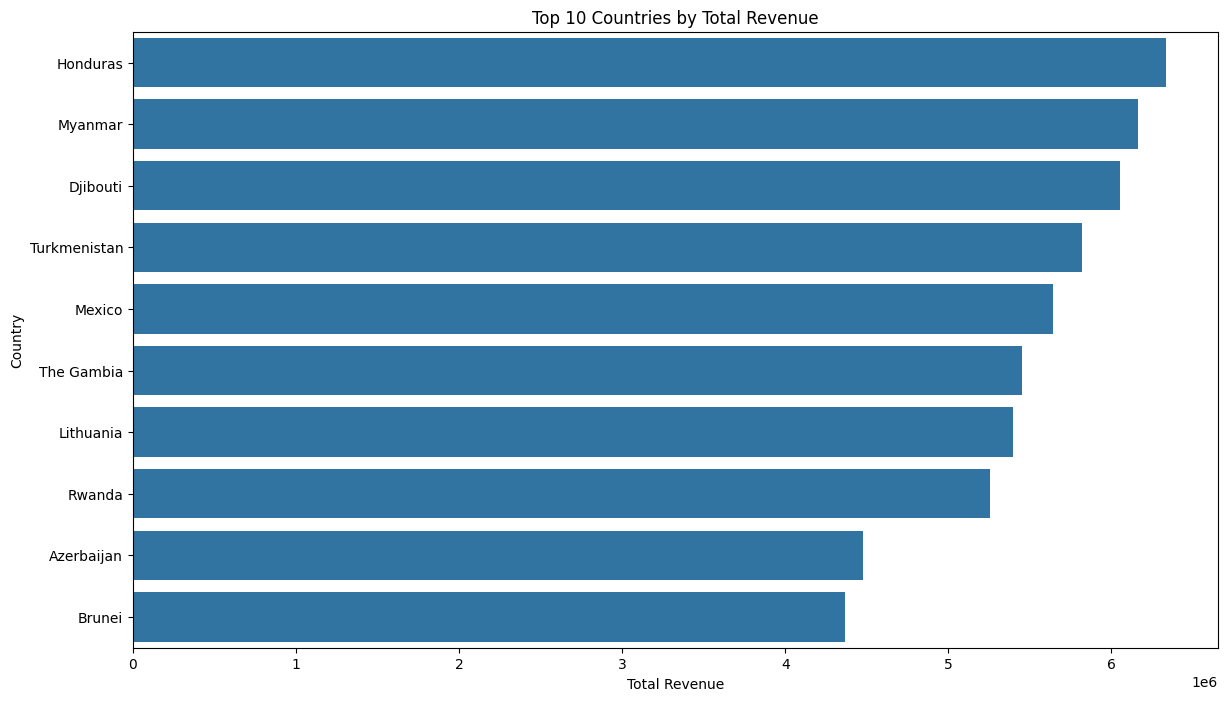

In [51]:
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales.head(10), x='Total Revenue', y='Country')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()


In [52]:
# Grouping the data by 'Order Priority' and calculating the total revenue, cost, and profit
priority_analysis = dataframe_Amazon_Sales_data.groupby('Order Priority')[['Total Revenue', 'Total Cost', 'Total Profit']].sum().reset_index()

(priority_analysis)


,Order Priority,Total Revenue,Total Cost,Total Profit
0,C,18855063.05,12106734.59,6748328.46
1,H,48749546.05,31857946.47,16891599.58
2,L,36628127.46,25769399.60,10858727.86
3,M,33116031.75,23446489.25,9669542.50


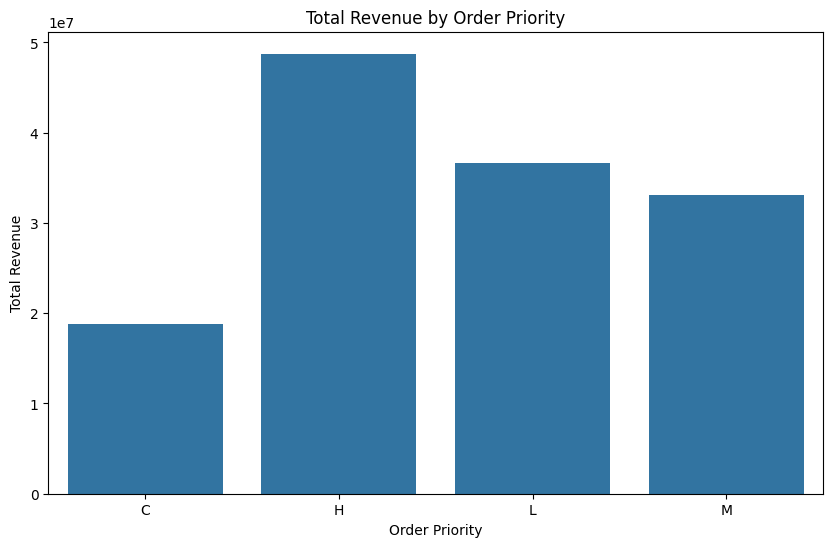

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=priority_analysis, x='Order Priority', y='Total Revenue')
plt.title('Total Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()


In [54]:
# Grouping the data by 'Product Category' and calculating the total revenue, cost, and profit
dataframe_Amazon_Sales_data['YearMonth'] = dataframe_Amazon_Sales_data['Order Date'].dt.to_period('M')

# Calculating the monthly sales trend
monthly_sales_trend = dataframe_Amazon_Sales_data.groupby('YearMonth')['Total Revenue'].sum().reset_index()

(monthly_sales_trend)


,YearMonth,Total Revenue
0,2010-02,3410661.12
1,2010-05,2587973.26
2,2010-06,1082418.40
3,2010-10,6064933.75
4,2010-11,3458252.00
5,2010-12,2581786.39
6,2011-01,1042225.35
7,2011-02,387002.20
8,2011-04,2798046.49
9,2011-05,272410.45


In [55]:
# Calculating the correlation matrix for numeric columns
numeric_columns = dataframe_Amazon_Sales_data.select_dtypes(include=[float, int]).columns
correlation_matrix = dataframe_Amazon_Sales_data[numeric_columns].corr()

print(correlation_matrix)

               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   

               Total Cost  Total Profit  
Order ID        -0.328944     -0.234638  
Units Sold       0.374746      0.564550  
Unit Price       0.787905      0.557365  
Unit Cost        0.774895      0.467214  
Total Revenue    0.983928      0.897327  
Total Cost       1.000000      0.804091  
Total Profit     0.804091      1.000000  


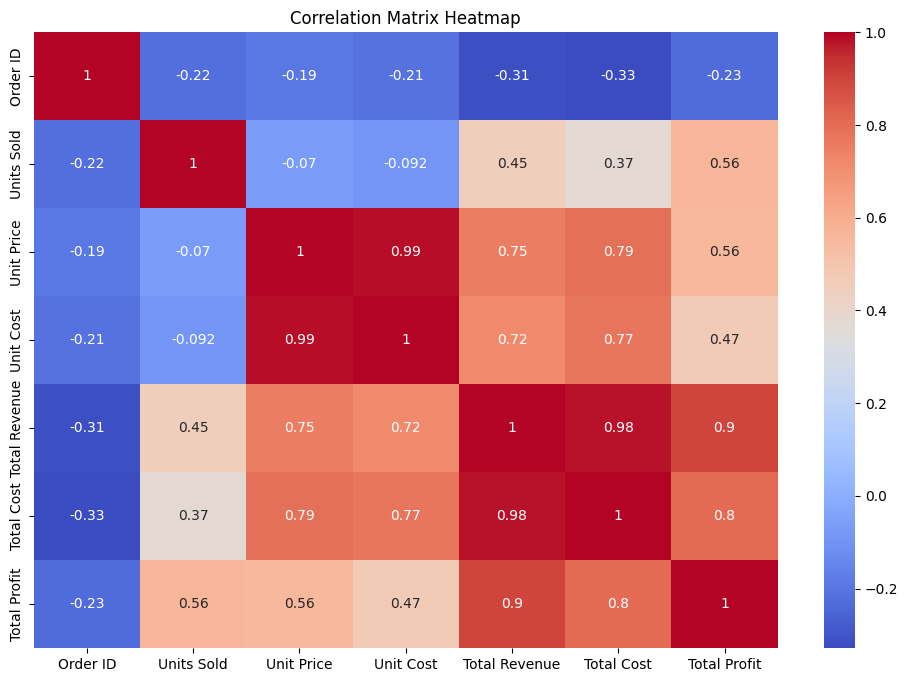

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


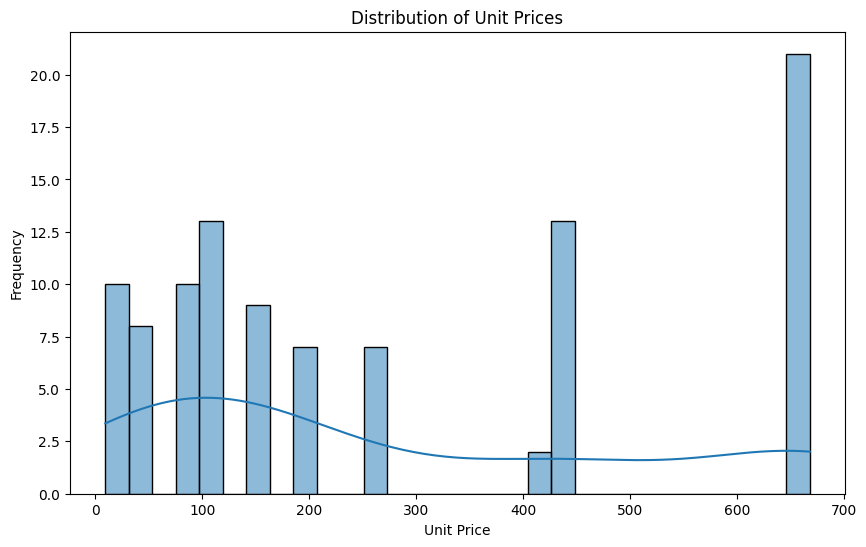

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(dataframe_Amazon_Sales_data['Unit Price'], bins=30, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

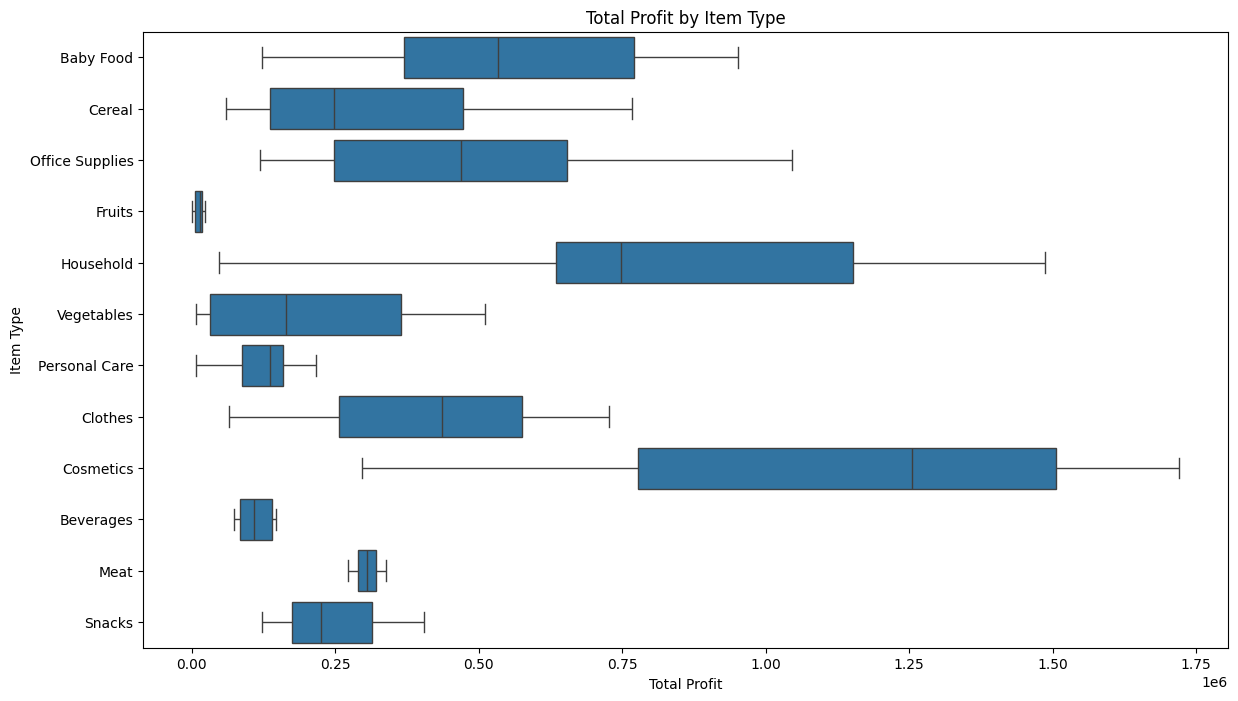

In [58]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=dataframe_Amazon_Sales_data, x='Total Profit', y='Item Type')
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()

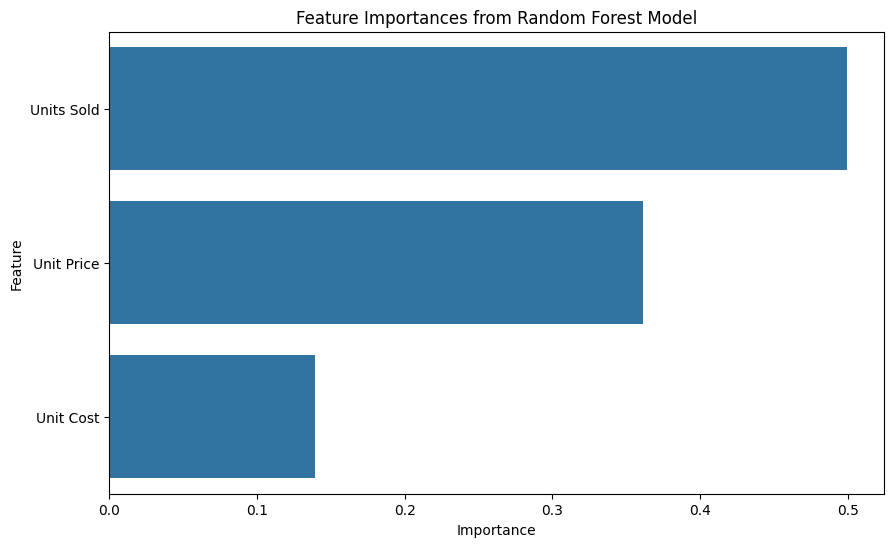

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Preparing the data for Random Forest model
features = dataframe_Amazon_Sales_data[['Units Sold', 'Unit Price', 'Unit Cost']]
target = dataframe_Amazon_Sales_data['Total Profit']

# Fitting the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Extracting feature importances
feature_importances = model.feature_importances_

# Creating a DataFrame for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features.columns)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

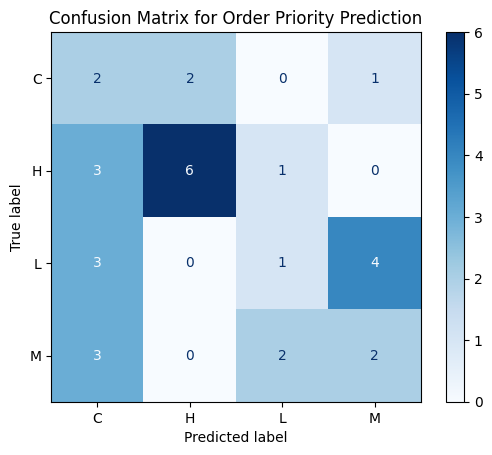

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Preparing the data for classification
target_encoded = dataframe_Amazon_Sales_data['Order Priority'].astype('category').cat.codes

# Selecting features for classification
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.3, random_state=42)

# Fitting the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataframe_Amazon_Sales_data['Order Priority'].astype('category').cat.categories)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Order Priority Prediction')
plt.show()

C:\Users\zahid\AppData\Local\Temp\ipykernel_8308\2349216052.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total Revenue', y=correct_product_column_name, palette='viridis')


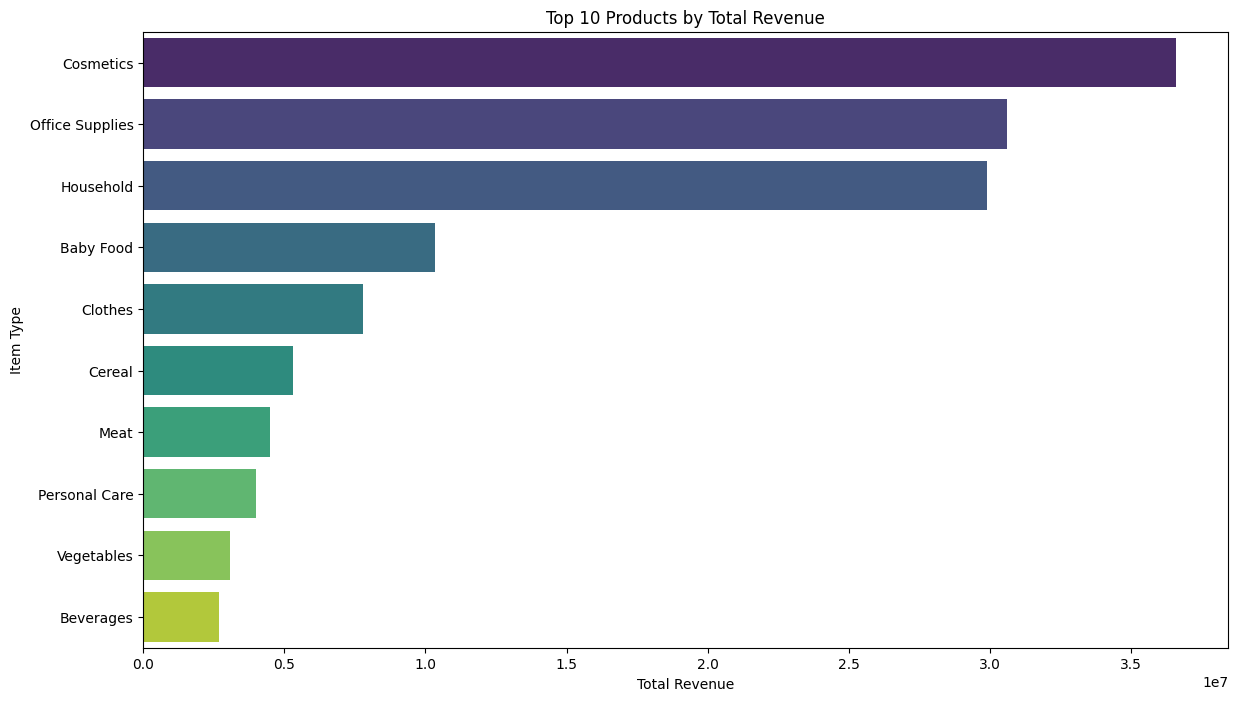

In [61]:
# Visualizing the top 10 products by total revenue
correct_product_column_name = 'Item Type' 

# Ensure the column name is correct
dataframe_Amazon_Sales_data['Total Revenue'] = pd.to_numeric(dataframe_Amazon_Sales_data['Total Revenue'], errors='coerce')

# Grouping by the correct product column and calculating total revenue
top_products = dataframe_Amazon_Sales_data.groupby(correct_product_column_name)['Total Revenue'].sum().nlargest(10).reset_index()

# Displaying the top products by total revenue
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='Total Revenue', y=correct_product_column_name, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel(correct_product_column_name)
plt.show()

C:\Users\zahid\AppData\Local\Temp\ipykernel_8308\1163642569.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_category, x='Total Revenue', y='Item Type', palette='plasma')


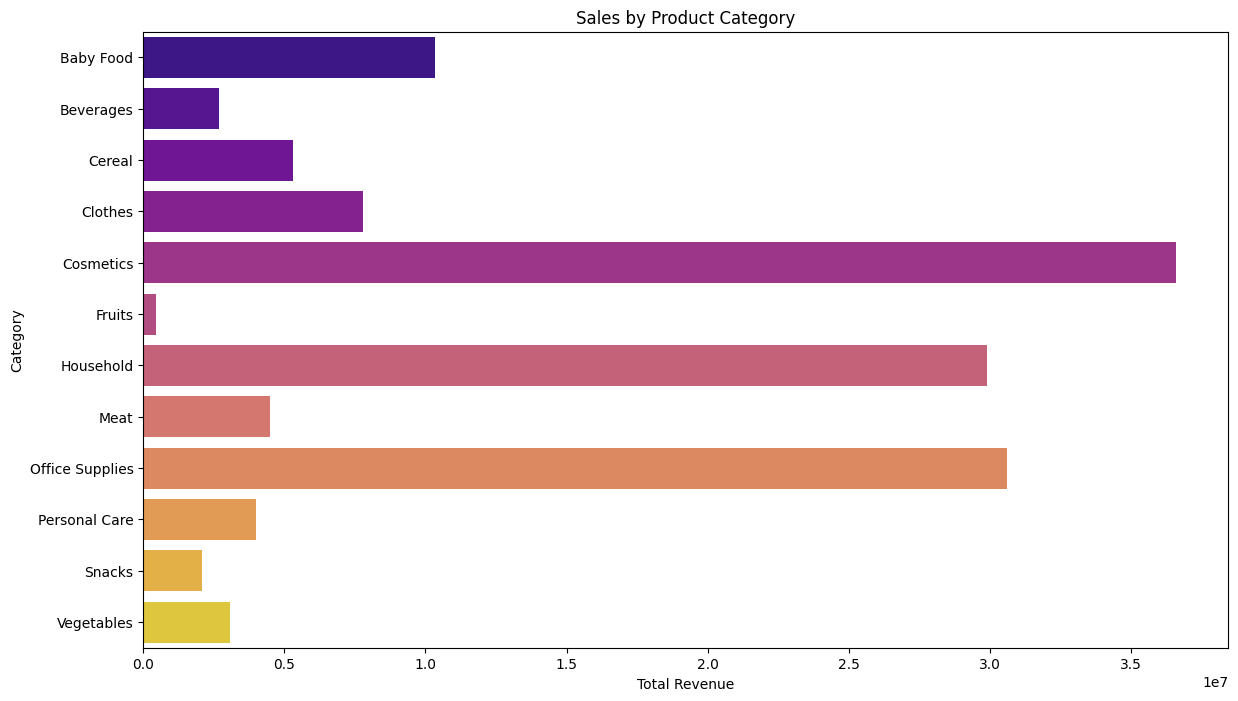

In [62]:
# Grouping the data by 'Item Type' and calculating the total revenue
sales_by_category = dataframe_Amazon_Sales_data.groupby('Item Type')['Total Revenue'].sum().reset_index()

# Displaying the sales by product category
plt.figure(figsize=(14, 8))
sns.barplot(data=sales_by_category, x='Total Revenue', y='Item Type', palette='plasma')
plt.title('Sales by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.show()

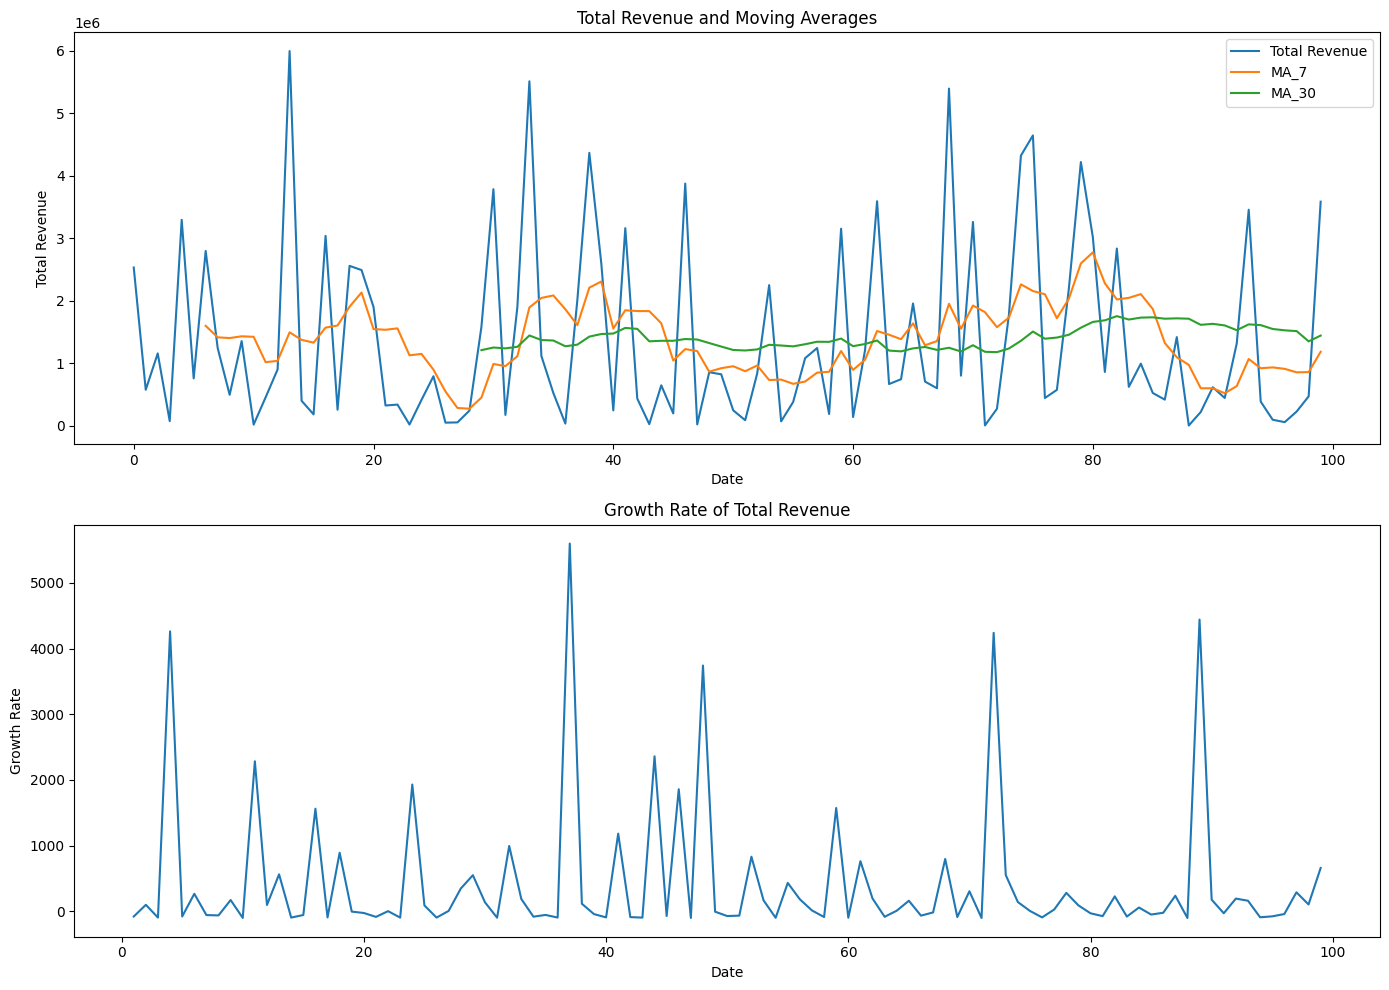

In [63]:
# Calculating moving averages for total revenue
dataframe_Amazon_Sales_data['MA_7'] = dataframe_Amazon_Sales_data['Total Revenue'].rolling(window=7).mean()
dataframe_Amazon_Sales_data['MA_30'] = dataframe_Amazon_Sales_data['Total Revenue'].rolling(window=30).mean()

import matplotlib.pyplot as plt
# Visualizing the total revenue, moving averages, and growth rate
dataframe_Amazon_Sales_data['Growth Rate'] = dataframe_Amazon_Sales_data['Total Revenue'].pct_change() * 100


fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot the total revenue and moving averages
dataframe_Amazon_Sales_data[['Total Revenue', 'MA_7', 'MA_30']].plot(ax=ax[0])
ax[0].set_title('Total Revenue and Moving Averages')
ax[0].set_ylabel('Total Revenue')
ax[0].set_xlabel('Date')

# plot the growth rate
dataframe_Amazon_Sales_data['Growth Rate'].plot(ax=ax[1])
ax[1].set_title('Growth Rate of Total Revenue')
ax[1].set_ylabel('Growth Rate')
ax[1].set_xlabel('Date')

plt.tight_layout()
plt.show()

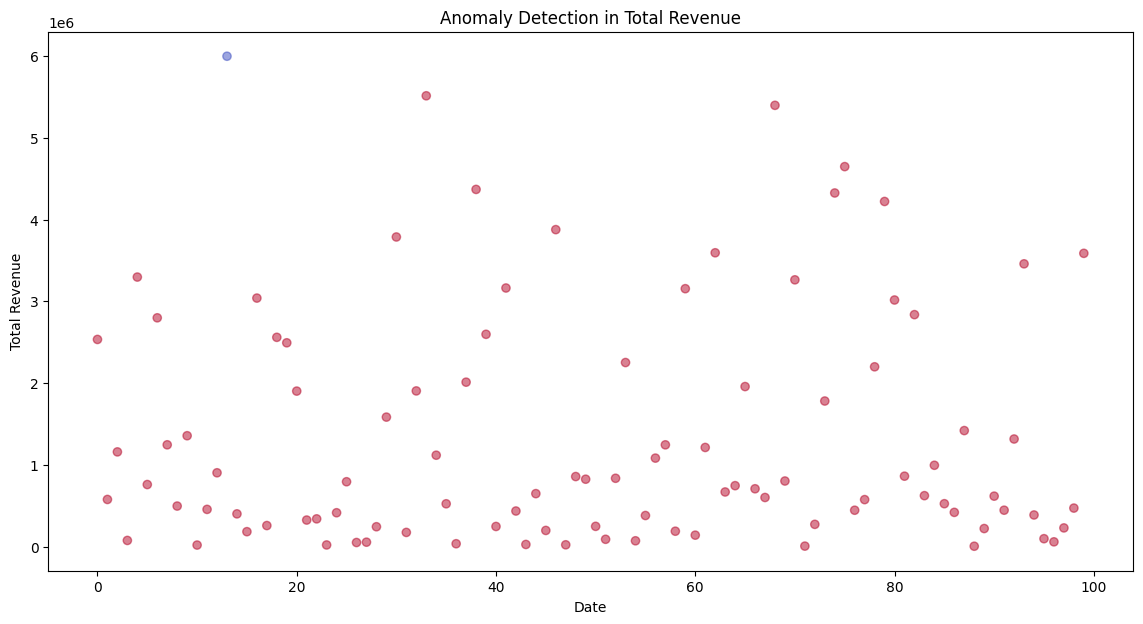

In [64]:
from sklearn.ensemble import IsolationForest

#  Select relevant features for anomaly detection
anomaly_data = dataframe_Amazon_Sales_data[['Units Sold', 'Unit Price', 'Total Revenue']].dropna()

# Fit Isolation Forest model for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomaly_data['Anomaly'] = iso_forest.fit_predict(anomaly_data)

# Convert -1 to 1 for anomalies and 1 to 0 for normal points
plt.figure(figsize=(14, 7))
plt.scatter(anomaly_data.index, anomaly_data['Total Revenue'], c=anomaly_data['Anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Detection in Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

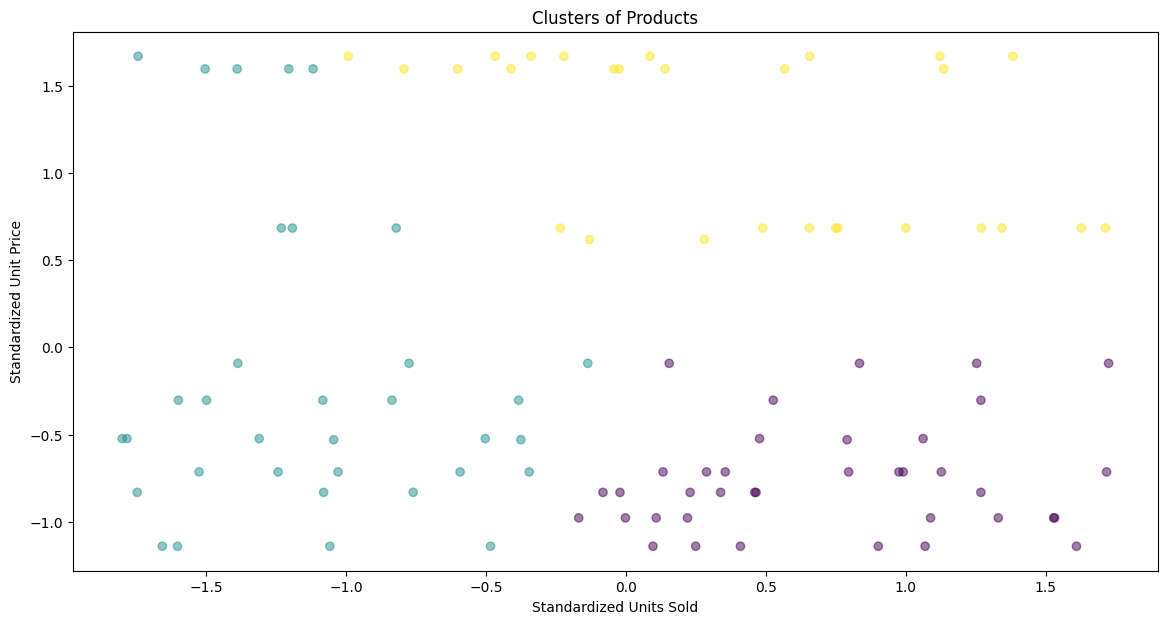

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
clustering_data = dataframe_Amazon_Sales_data[['Units Sold', 'Unit Price', 'Total Revenue']].dropna()

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data_scaled)

# Assign cluster labels to the original dataframe
dataframe_Amazon_Sales_data.loc[clustering_data.index, 'Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(14, 7))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Clusters of Products')
plt.xlabel('Standardized Units Sold')
plt.ylabel('Standardized Unit Price')
plt.show()

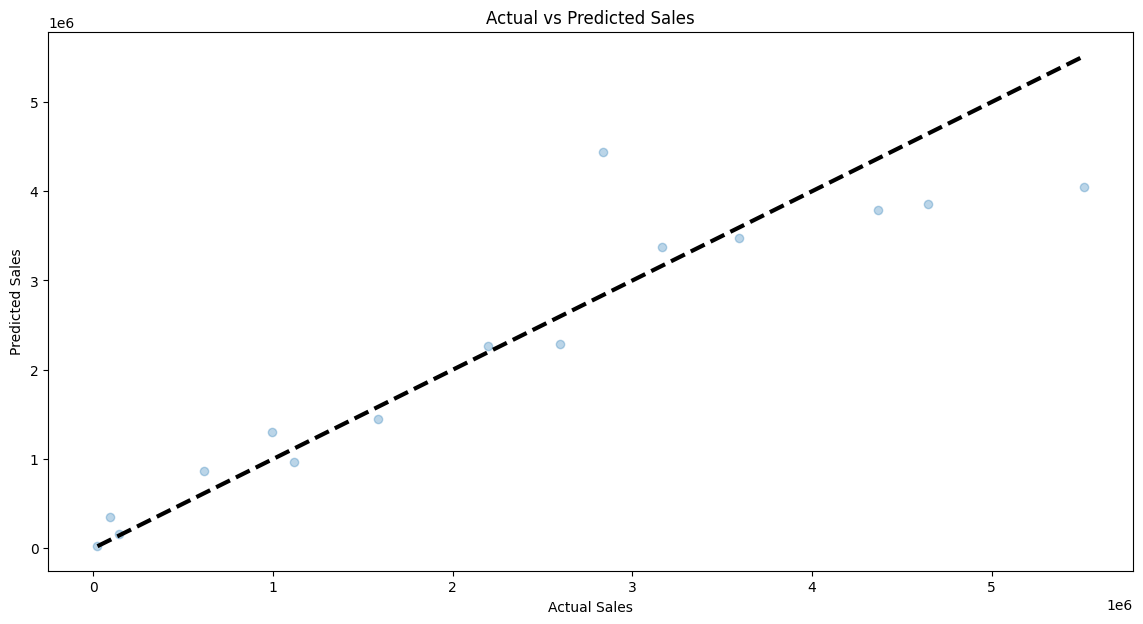

In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming the dataframe_Amazon_Sales_data is already loaded and preprocessed

# Define features and target variable
features = dataframe_Amazon_Sales_data[['Units Sold', 'Unit Price', 'MA_7', 'MA_30', 'Growth Rate']].dropna()
target = dataframe_Amazon_Sales_data.loc[features.index, 'Total Revenue']

# Ensure the target variable is numeric
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

#
# Make predictions
predictions = xgb_model.predict(X_test)

# Plotting Actual vs Predicted Sales
plt.figure(figsize=(14, 7))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

C:\Users\zahid\AppData\Local\Temp\ipykernel_8308\1981413020.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = dataframe_Amazon_Sales_data['Total Revenue'].resample('M').sum()


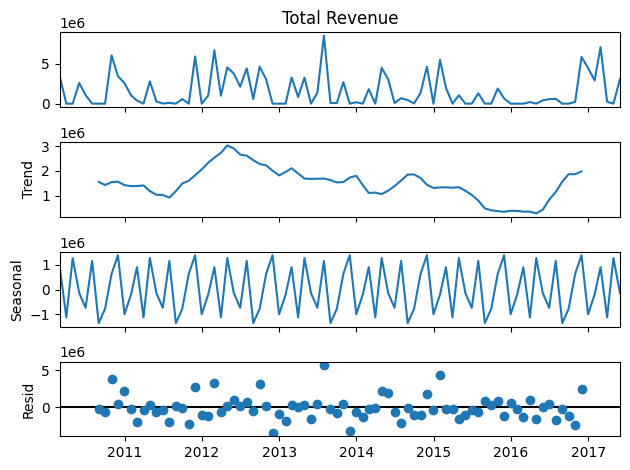

In [67]:
import statsmodels.api as sm

# Ensure 'Order Date' is numeric
# Convert 'Order Date' to datetime
dataframe_Amazon_Sales_data['Order Date'] = pd.to_datetime(dataframe_Amazon_Sales_data['Order Date'])

# Set 'Order Date' as the index
dataframe_Amazon_Sales_data.set_index('Order Date', inplace=True)

# Resample the 'Total Revenue' by month and sum the values
monthly_revenue = dataframe_Amazon_Sales_data['Total Revenue'].resample('M').sum()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(monthly_revenue, model='additive')
fig = decomposition.plot()
plt.show()